In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Pacific_Extent = pd.read_excel(filepath, sheet_name='Pacific-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Pacific_Extent)
fp.date_time(Pacific_Extent)

,Extent,Date
0,668714.275,1979-01-01
1,566930.458,1979-02-01
2,688420.115,1979-03-01
3,859963.043,1979-04-01
4,1127120.160,1979-05-01
...,...,...
533,1134056.102,2023-06-01
534,1484824.377,2023-07-01
535,1671324.717,2023-08-01
536,1726376.097,2023-09-01


In [5]:
scaler = MinMaxScaler()
Pacific_Extent['Extent'] = scaler.fit_transform(Pacific_Extent['Extent'].values.reshape(-1, 1))

In [6]:
extent = Pacific_Extent['Extent']
W_S=12
X,y = fp.df_to_X_y(extent, W_S)
X.shape, y.shape

((526, 12, 1), (526,))

In [7]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(InputLayer((W_S, 1)))
model.add(Bidirectional(LSTM(128, activation='relu', kernel_constraint=MaxNorm(1.0), return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, activation='relu', kernel_constraint=MaxNorm(1.0), return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32, activation='relu', kernel_constraint=MaxNorm(1.0))))
model.add(Dense(1, activation='linear'))

cp = ModelCheckpoint('Pacific_model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [10]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
53/53 [==============================] - 40s 530ms/step - loss: 0.2271 - root_mean_squared_error: 0.4765 - val_loss: 0.1512 - val_root_mean_squared_error: 0.3889
Epoch 2/50
53/53 [==============================] - 25s 487ms/step - loss: 0.0919 - root_mean_squared_error: 0.3032 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2349
Epoch 3/50
53/53 [==============================] - 26s 490ms/step - loss: 0.0545 - root_mean_squared_error: 0.2334 - val_loss: 0.0470 - val_root_mean_squared_error: 0.2169
Epoch 4/50
53/53 [==============================] - 25s 479ms/step - loss: 0.0442 - root_mean_squared_error: 0.2103 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1859
Epoch 5/50
53/53 [==============================] - 26s 492ms/step - loss: 0.0325 - root_mean_squared_error: 0.1804 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1520
Epoch 6/50
53/53 [==============================] - 26s 491ms/step - loss: 0.0207 - root_mean_squared_error: 0.1440 - val_loss: 0.0138 

Epoch 30/50
53/53 [==============================] - 4s 80ms/step - loss: 0.0056 - root_mean_squared_error: 0.0746 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0703
Epoch 31/50
53/53 [==============================] - 5s 85ms/step - loss: 0.0058 - root_mean_squared_error: 0.0761 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0600
Epoch 32/50
53/53 [==============================] - 5s 85ms/step - loss: 0.0049 - root_mean_squared_error: 0.0696 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0585
Epoch 33/50
53/53 [==============================] - 27s 525ms/step - loss: 0.0052 - root_mean_squared_error: 0.0719 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0560
Epoch 34/50
53/53 [==============================] - 26s 505ms/step - loss: 0.0049 - root_mean_squared_error: 0.0697 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0556
Epoch 35/50
53/53 [==============================] - 4s 69ms/step - loss: 0.0052 - root_mean_squared_error: 0.0719 - val_loss: 0.0038 - 

In [11]:
time = (etime - stime)/60
print(f'{time} minutes')

12.887503576278686 minutes


In [12]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

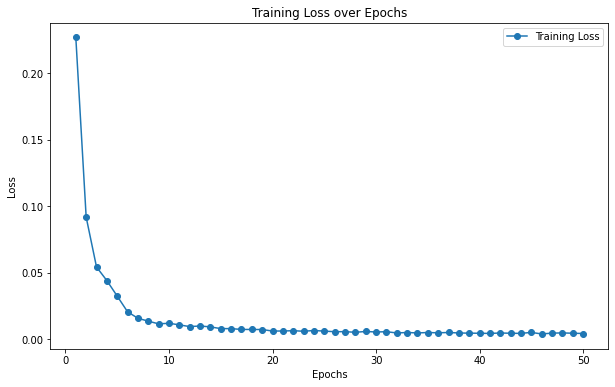

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

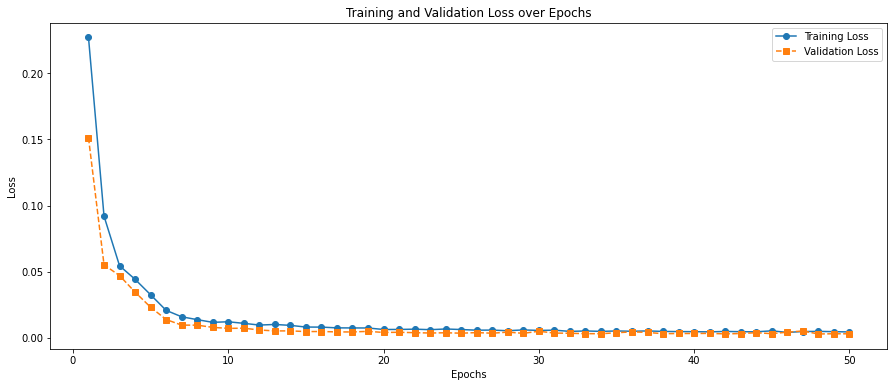

In [14]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.models import load_model
model1 = load_model('Pacific_model/')

In [9]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 1s 30ms/step


In [10]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.05731248524279765
MAE : 0.043059838115773005


In [11]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [12]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,1.090276e+06,1044555.651
1,1.382398e+06,1400934.040
2,1.617977e+06,1701391.499
3,1.794355e+06,1890231.668
4,1.882172e+06,2203401.829
5,1.900767e+06,1960480.542
6,1.480582e+06,1264318.504
7,8.093799e+05,863206.294
8,4.860317e+05,635624.004
9,3.776513e+05,460009.672


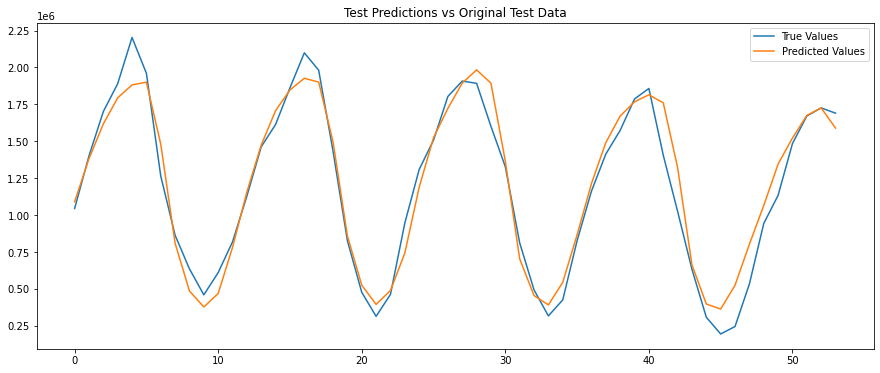

In [13]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [14]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 11ms/step


In [17]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

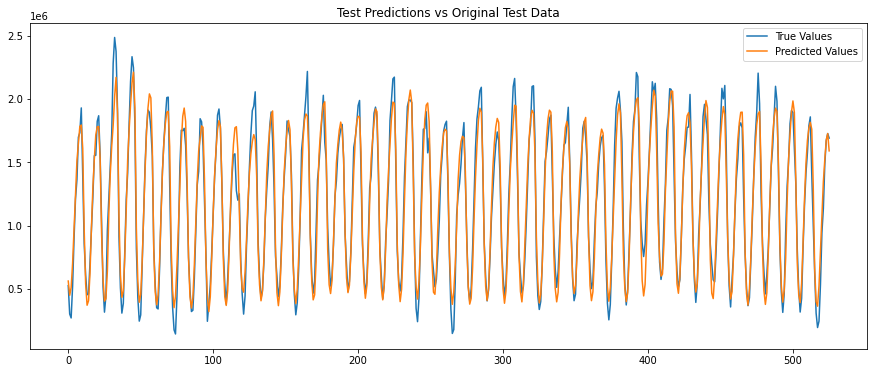

In [18]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()